In [26]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Standard Units

In [27]:
exams = Table.read_table('exams_fa18.csv')
exams.show(5)

Midterm,Final
91,88
89.5,84
78,71.5
87,88
72,72.5


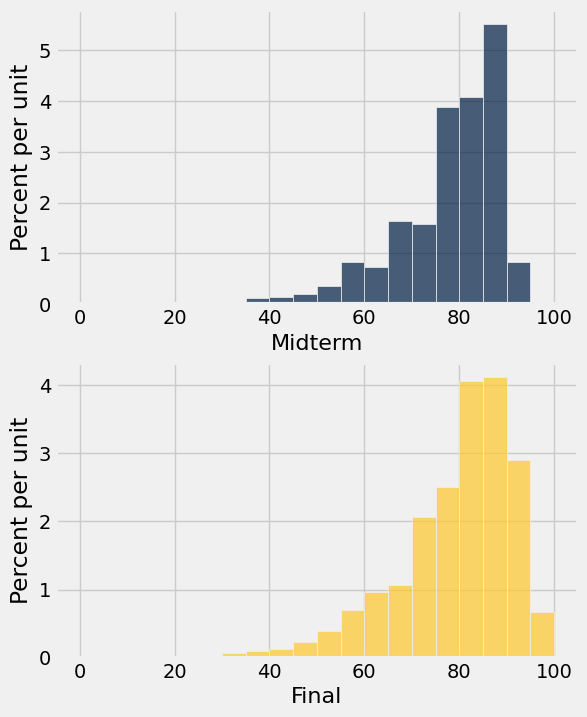

In [28]:
exams.hist(overlay=False, bins=np.arange(0,101,5))

In [29]:
def standard_units(x):
    """Convert array of values to standard units"""
    return (x - np.average(x)) / np.std(x)

In [30]:
midterm_su = standard_units(exams.column('Midterm'))
exams = exams.with_column('Midterm in Standard Units', midterm_su)

final_su = standard_units(exams.column('Final'))
exams = exams.with_column('Final in Standard Units', final_su)

exams.show(10)

Midterm,Final,Midterm in Standard Units,Final in Standard Units
91,88,1.16278,0.717241
89.5,84,1.03032,0.390935
78,71.5,0.0147889,-0.628768
87,88,0.809552,0.717241
72,72.5,-0.515053,-0.547191
71.5,61,-0.559206,-1.48532
82,92.5,0.368017,1.08433
84.5,87,0.588784,0.635664
85,92,0.632938,1.04355
78,71,0.0147889,-0.669556


In [31]:
np.mean(midterm_su), np.std(final_su)

(7.3979112333315587e-16, 1.0)

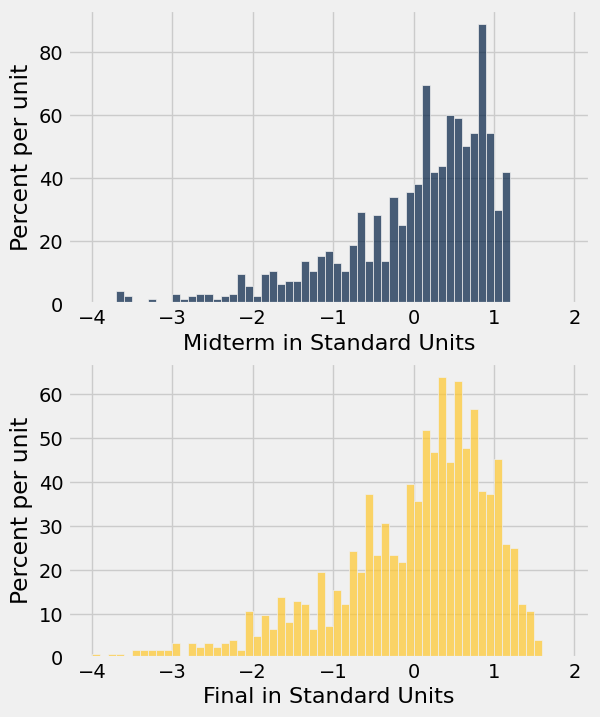

In [32]:
exams.select(
    'Midterm in Standard Units', 'Final in Standard Units'
).hist(overlay=False, bins=np.arange(-4,2,0.1))

## The SD and Bell Shaped Curves

In [33]:
births = Table.read_table('baby.csv')

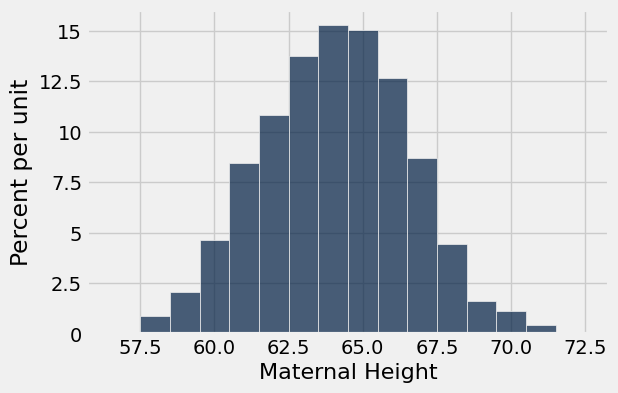

In [34]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

In [35]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

(64.049403747870528, 2.5250254409674375)

In [ ]:
#SD below & above the mean
print(np.mean(heights) - np.std(heights), np.mean(heights) + np.std(heights))
print(np.mean(heights) - 2*np.std(heights), np.mean(heights) + 2*np.std(heights))
print(np.mean(heights) - 3*np.std(heights), np.mean(heights) + 3*np.std(heights))

61.5243783069 66.5744291888
58.9993528659 69.0994546298
56.474327425 71.6244800708


In [ ]:
# Improvement over Chebychev
center = births.where('Maternal Height', are.between(np.mean(heights) - np.std(heights), np.mean(heights) + np.std(heights)))
center.num_rows / births.num_rows

0.9965928449744463

## Central Limit Theorem ##

In [37]:
united = Table.read_table('united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


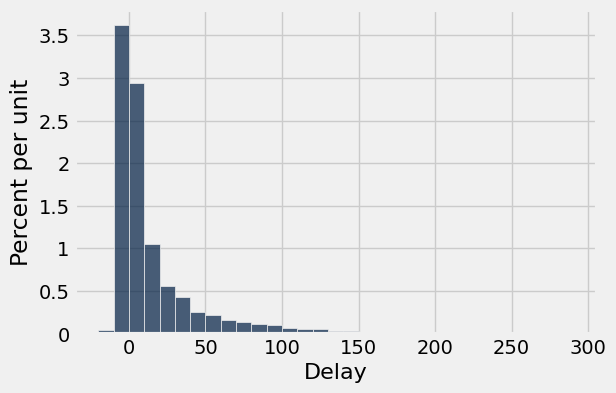

In [38]:
united_bins = np.arange(-20, 300, 10)
united.hist('Delay', bins=united_bins)

In [39]:
delays = united.column('Delay')
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_mean, delay_sd

(16.658155515370705, 39.480199851609314)

In [40]:
percentile(50, delays)

2

In [41]:
def one_sample_mean(sample_size):
    """ 
    Takes a sample from the population of flights 
    and computes its mean
    """
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [42]:
one_sample_mean(100)

15.619999999999999

In [43]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [44]:
sample_means_100 = ten_thousand_sample_means(100)

In [45]:
sample_means_100

array([ 12.51,  18.99,  18.12, ...,  14.44,  17.27,  13.78])

In [46]:
len(sample_means_100)

10000

Population Average: 16.6581555154


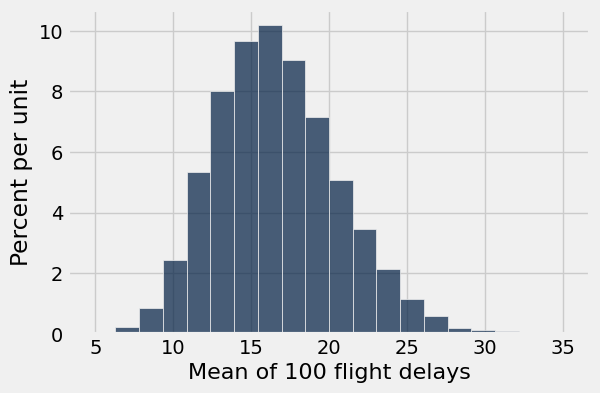

In [47]:
Table().with_column(
    'Mean of 100 flight delays', sample_means_100).hist(bins=20)

print('Population Average:', delay_mean)

Population Average: 16.6581555154


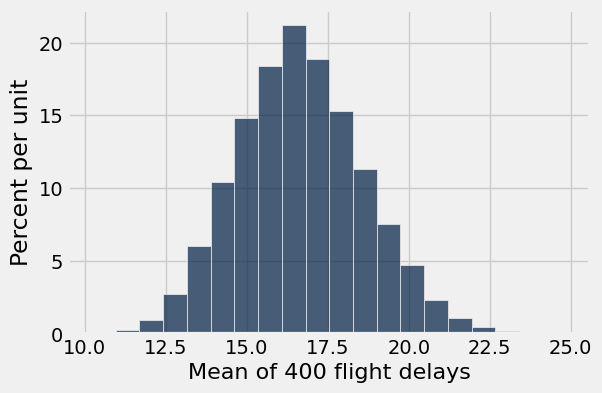

In [48]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column(
    'Mean of 400 flight delays', sample_means_400).hist(bins=20)

print('Population Average:', delay_mean)

In [49]:
wheel = Table().read_table('roulette_wheel.csv')

In [50]:
def red_winnings(color):
    if color == 'red':
        return 1
    else:
        return -1

In [51]:
red = wheel.with_column(
    'Winnings: Red', wheel.apply(red_winnings, 'Color')
    )
red

Pocket,Color,Winnings: Red
0,green,-1
0,green,-1
1,red,1
2,black,-1
3,red,1
4,black,-1
5,red,1
6,black,-1
7,red,1
8,black,-1


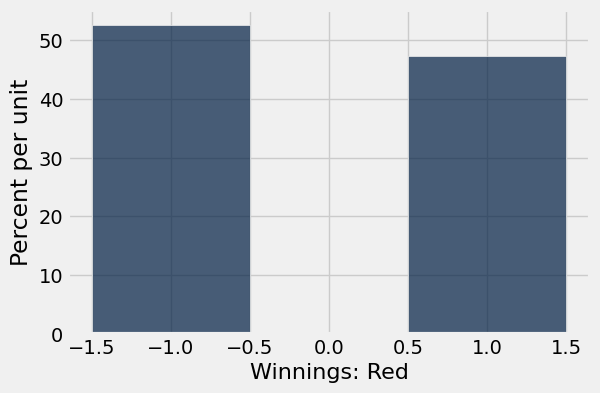

In [52]:
red.select('Winnings: Red').hist(bins=np.arange(-1.5, 1.6, 1))

In [53]:
num_bets = 400
repetitions = 10000

net_gain_red = make_array()

for i in np.arange(repetitions):
    spins = red.sample(num_bets)
    new_net_gain_red = spins.column('Winnings: Red').sum()
    net_gain_red = np.append(net_gain_red, new_net_gain_red)


results = Table().with_column(
    'Net Gain on Red', net_gain_red
    )

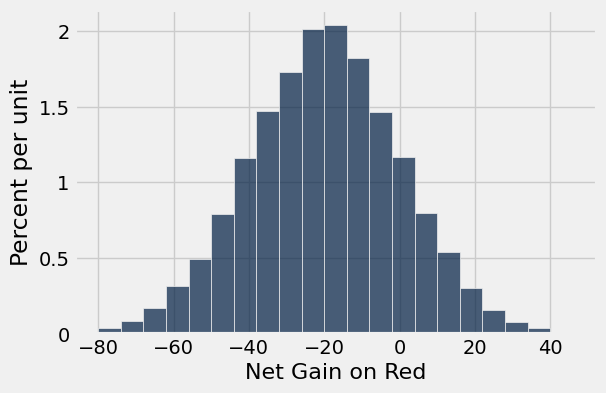

In [54]:
results.hist(bins=np.arange(-80, 50, 6))